In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from pandsim import *

The following specified the basic properties of the simulation. The most important properties about the disease are:
- The infectious parameters
`inf_spec`=[$r_{\rm inf}, t_{\rm avg},t_{\rm std}$]
- The recovery parameters
`recov_spec`=[$ t_{\rm avg},t_{\rm std}$]
- The death parameters
`dead_spec`=[$ t_{\rm avg},t_{\rm std}$]

Note the $r_{\rm inf}$ is the radii of the infectious zone. Only when subject enters this zone will trigger the program to sample the condition that if the subject will be infected. The unit is meter.
Others like $t_{\rm avg}$ and $t_{\rm std}$ are the average time and standard deviation of reaching that condition. The unit is hour.

In [22]:
# Specified basic parameters
# number of ill in the beginning
n_ill = 5
# number of health in the beginning
n_health = 795
# specified the parameters for infection, recovery and death
inf_spec = [2.5,0.25,0.5]
recov_spec = [14*24,10*24]
dead_spec = [35*24,10*24]
# Size of the box, meters
box_size = [[-600,600],[-600,600]]
# Initial positions of the subjects, meters
prange = [[-400,400],[-400,400]]
# Initial velocity of the subjects, meters/hour
vrange = [5,30]
# the protectability of wearing mask, it should be positive and larger than o1
mask = None
# size of the time step
dt = 0.05
# The first number 60 is days, change this value asks the simulation to run in between 0 to that days
steps = int(60*24*(1/dt))
# Should it save the data after running the simulation
save_data = True
# Should the programe adjust the dt size to resolve the enough time resolution when the user-input is too corase-grained?
self_adaptive = False
# Name of the disease. U stands unknown
disease_name = 'Flu U'

In the above, I set `save_data=True`, which when the simulation is over, it will automatically save the simulated data into a folder named `disease_name` in the same location as this notebook. After running this simulation, it will also displays the corresponding time evolving statistics.

Simulation with total 28800 steps completed in 136.528 seconds
Data saved.


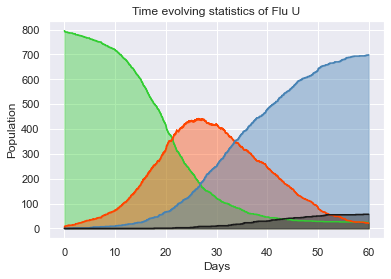

In [23]:
# Running the simulation according to the above specified properties
_ = PandemicSimulation(n_ill = n_ill,n_health = n_health,steps = steps, dt = dt,inf_spec = inf_spec,recov_spec = recov_spec,dead_spec = dead_spec,
                         mask_protect = mask, self_adaptive = self_adaptive, save_data = save_data, disease_name = disease_name, box_size = box_size, prange = prange, vrange = vrange)

In [18]:
# Load simulated data if you want to do something with it
# If not, you can ignore this function
FluUsum,FluUout = loadsim(disease_name)

If you want to draw the simulated data, you can use the following function. After running, it will also generate a log file `imginfo.txt`. Please do not delete it if you want to continue making a vide out of these figures. 

In [24]:
# Plot the steps into a PNG figure
# to avoid plotting too many figures, I will ask to program to skip some of the steps by using skip
# How many skips should be skipped between two plots. If it is None then no step will be skipped
skip = 10
dpi = 150

In [25]:
drawsim('Flu U',skip=skip,dpi=dpi)

Drawing process has completed!


When the `disease_name` is given, it will search the folder that stores the images plotted by `drawsim` via the log file `imginfo.txt`. 

In [26]:
# Make all the output figures into a single video, mp4 format
# The fps of the video
fps = 40

In [27]:
mkvideo(disease_name,fps=fps)